In [5]:
import numpy as np
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [7]:
encoding_dim = 10

input_image = Input(shape=(np.prod(x_train.shape[1:]),))

hidden_layer1 = Dense(16, activation='relu')(input_image)
hidden_layer2 = Dense(16, activation='relu')(hidden_layer1)
output_layer = Dense(10, activation='sigmoid')(hidden_layer2)

model = Model(input_image, output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Training network
model.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9547 - loss: 0.1574 - val_accuracy: 0.9522 - val_loss: 0.1684
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9557 - loss: 0.1540 - val_accuracy: 0.9533 - val_loss: 0.1668
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9568 - loss: 0.1479 - val_accuracy: 0.9542 - val_loss: 0.1646
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - loss: 0.1487 - val_accuracy: 0.9546 - val_loss: 0.1625
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9584 - loss: 0.1429 - val_accuracy: 0.9552 - val_loss: 0.1607
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9588 - loss: 0.1407 - val_accuracy: 0.9558 - val_loss: 0.1595
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9592 - loss: 0.1428 - val_accuracy: 0.9545 - val_loss: 0.1601
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9601 - loss: 0.1378 - val_accuracy: 0

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9593 - loss: 0.1549


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


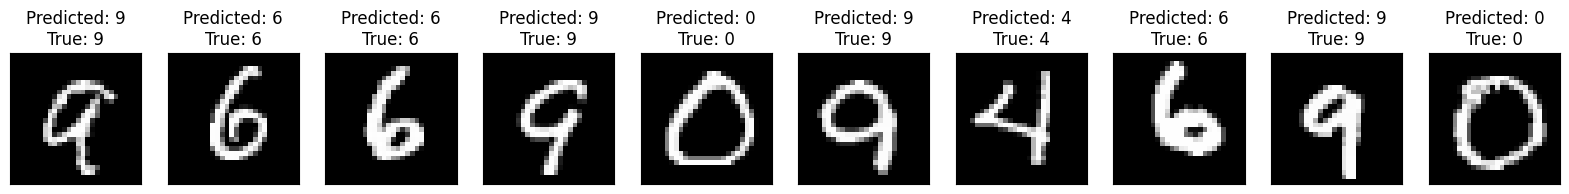

In [11]:
# Boilerplate code generated from chatGPT 

n = 10  

# Select `n` random indices from the test set
random_indices = np.random.choice(len(x_test), n, replace=False)

# Get the corresponding images and true labels
sample_images = x_test[random_indices]
true_labels = y_test[random_indices]

# Get predictions from the model
predictions = model.predict(sample_images)

# Plot original images and predicted labels
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {true_labels[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()